# Experiments with class imbalance

Aim is to investigate how best to train a random forest classifier given heavy class imbalance. We take the iris dataset and artificially prune one class. The aim is to then force the fitting procedure to always consider all the training instances of the pruned class for each tree in the forest, with all other classes being subjected to the usual bagging i.e random subsets being selected to train each tree. 

In [2]:
import pandas as pd
import sklearn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef as mcc
from sklearn.model_selection import StratifiedKFold as splitter

Get the raw data into a dataframe

In [3]:
iris = datasets.load_iris()

#Set up column names
col_names = iris.feature_names
col_names.extend(['target'])

#Set up data into pandas friendly format
cols = iris.data
num_points = cols.shape[0]

targs = iris.target
targs = targs.reshape(num_points, 1)

labelled_data = np.concatenate((cols, targs), axis=1)

#Store everything in a dataframe
idf = pd.DataFrame(data=labelled_data, columns=col_names)

Play around with the minority class and check intuition with resampling - should see estimate for feature mean follow a gaussian 

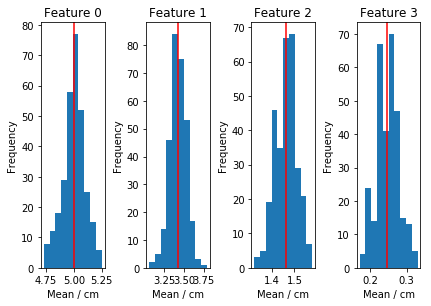

In [4]:
num_repeats = 300
chosen_class = 0
minority_class = idf.loc[idf['target']==chosen_class]
means = []
true_means = minority_class.mean().values

#Sample 20% of the class to look at how the feature means behave
for ii in range(num_repeats):
    sample = minority_class.sample(frac=0.2)
    sample_mean = sample.mean().values.tolist()
    means.append(sample_mean)

fig, axs = plt.subplots(1, 4)
plt.tight_layout()
for jj in range(4):
    d = [i[jj] for i in means]
    axs[jj].hist(d)
    axs[jj].axvline(true_means[jj], 0, axs[jj].get_ylim()[1], color='red')
    axs[jj].set_xlabel('Mean / cm')
    axs[jj].set_ylabel('Frequency')
    axs[jj].set_title('Feature {}'.format(jj))
plt.show()

1) What happens when we just fit a random forest to the data without attempting to address the imbalance?

In [5]:
#Actually create the imbalance by dropping records from the dataframe
sample_to_drop = minority_class.sample(frac=0.6).index
idf = idf.drop(sample_to_drop)

#Check the dropping worked
print(idf['target'].value_counts())

skf = splitter(n_splits = 10)
rfc = RandomForestClassifier(n_estimators = 100)

#Names to use for indexing the dataframe
feature_names = idf.columns.values[0:-1].tolist()

#Data labels
labels = idf['target'].values

for train_index, test_index in skf.split(np.zeros(len(labels)), labels):
    train = idf.iloc[train_index]
    test = idf.iloc[test_index]
    
    x_train = train[feature_names].values
    y_train = train['target'].values
        
    x_test = test[feature_names].values
    y_test = test['target'].values
    
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    perf = mcc(y_test, y_pred)
    
    print('mcc: {}'.format(perf))


2.0    50
1.0    50
0.0    20
Name: target, dtype: int64
mcc: 1.0
mcc: 0.8764598212022147
mcc: 1.0
mcc: 0.8764598212022147
mcc: 0.8764598212022147
mcc: 0.8764598212022147
mcc: 0.7333333333333333
mcc: 1.0
mcc: 1.0
mcc: 1.0


Iris is clearly too easy - even wth heavy imbalance. On average, mattews correlation coeff is still close to 1. Try another more difficult dataset eg the shuttle dataset, which has heavy class imbalance built in. Need to use a metric for assessing performance which is reflective of this.

Recall for a given class is R = TP/(TP + FN) i.e the fraction of class instances correctly classified.
Precision for a given class is P = TP/(TP + FP) i.e the fraction of class predictions which are correct

Get the shuttle dataset...

1    45586
4     8903
5     3267
3      171
2       49
7       13
6       10
Name: class, dtype: int64


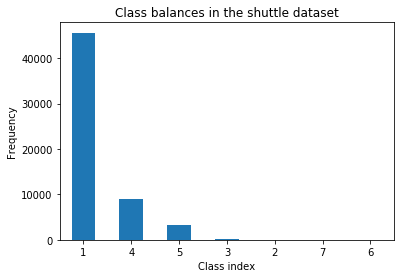

<Figure size 432x288 with 0 Axes>

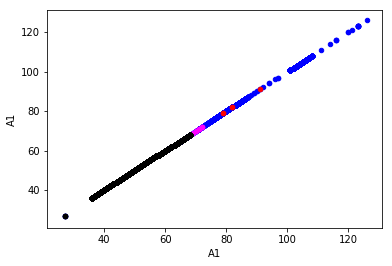

<Figure size 432x288 with 0 Axes>

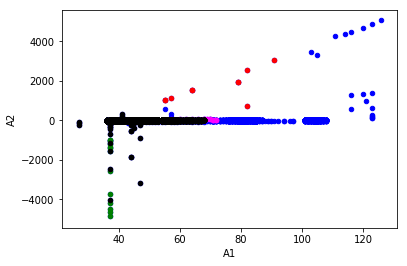

<Figure size 432x288 with 0 Axes>

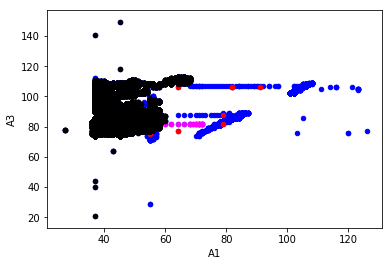

<Figure size 432x288 with 0 Axes>

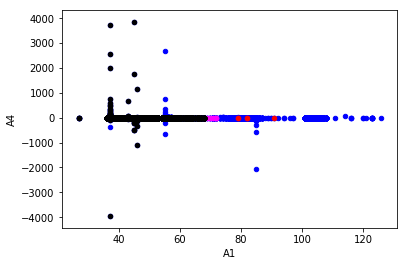

<Figure size 432x288 with 0 Axes>

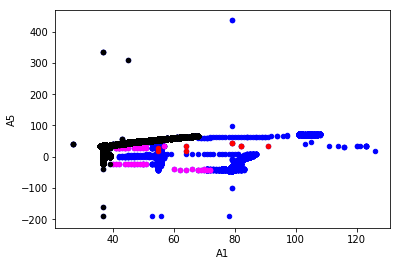

<Figure size 432x288 with 0 Axes>

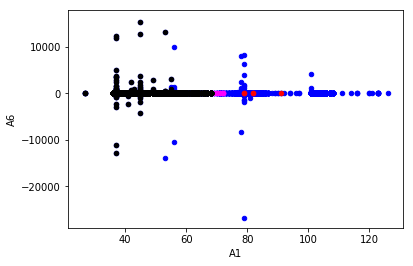

<Figure size 432x288 with 0 Axes>

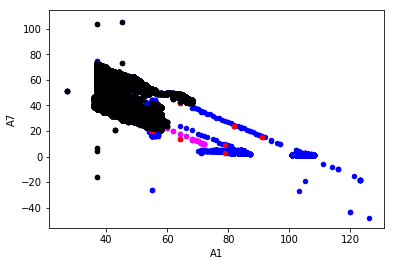

<Figure size 432x288 with 0 Axes>

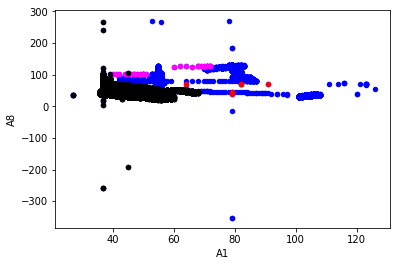

<Figure size 432x288 with 0 Axes>

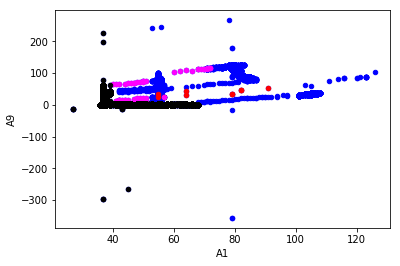

<Figure size 432x288 with 0 Axes>

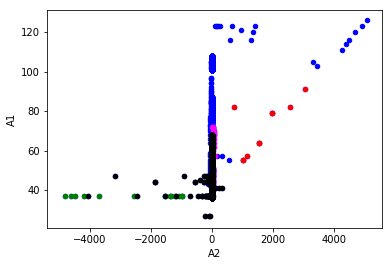

<Figure size 432x288 with 0 Axes>

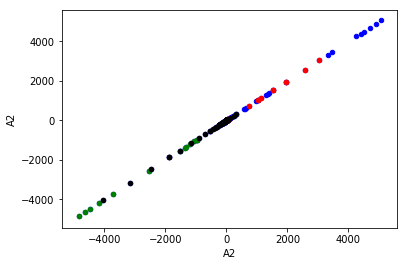

<Figure size 432x288 with 0 Axes>

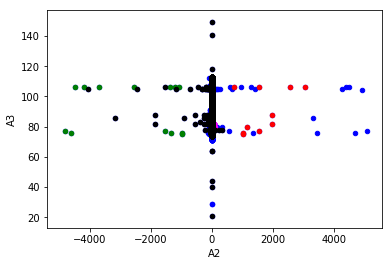

<Figure size 432x288 with 0 Axes>

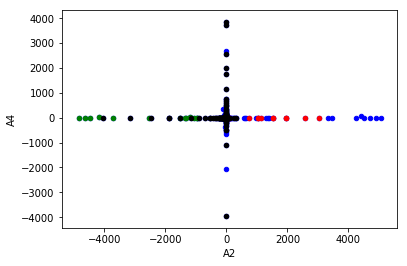

<Figure size 432x288 with 0 Axes>

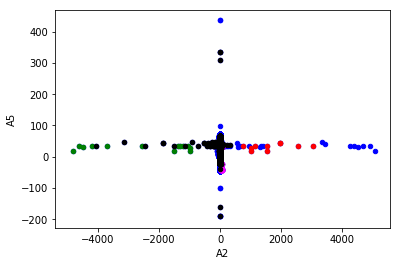

<Figure size 432x288 with 0 Axes>

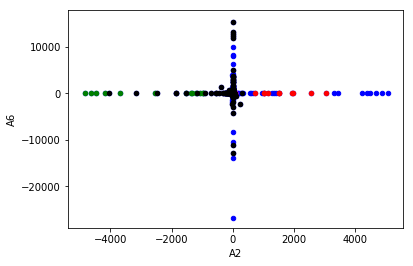

<Figure size 432x288 with 0 Axes>

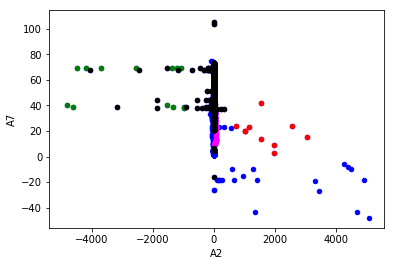

<Figure size 432x288 with 0 Axes>

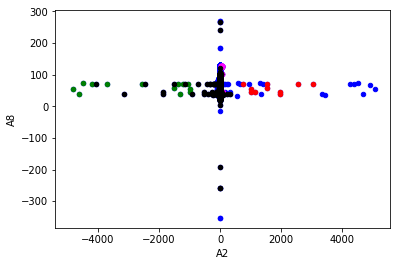

<Figure size 432x288 with 0 Axes>

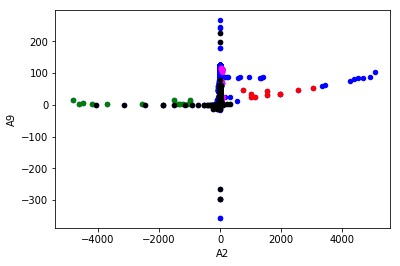

<Figure size 432x288 with 0 Axes>

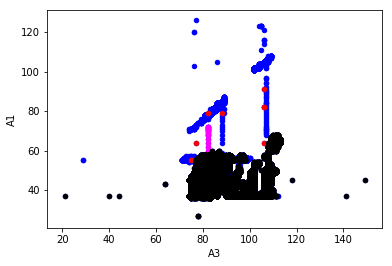

<Figure size 432x288 with 0 Axes>

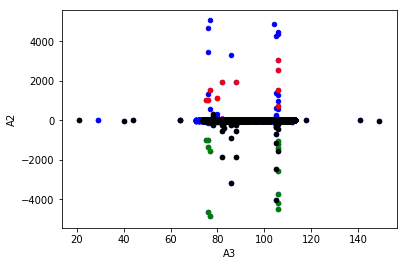

<Figure size 432x288 with 0 Axes>

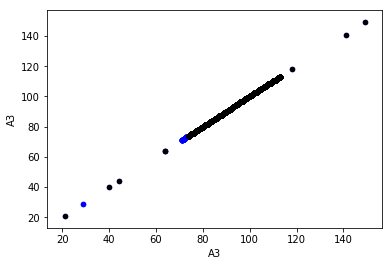

<Figure size 432x288 with 0 Axes>

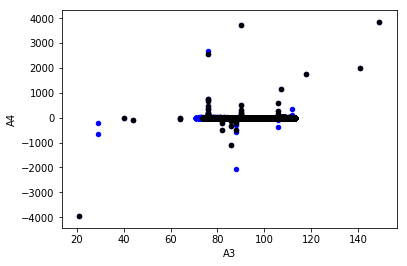

<Figure size 432x288 with 0 Axes>

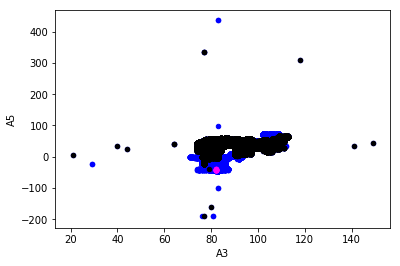

<Figure size 432x288 with 0 Axes>

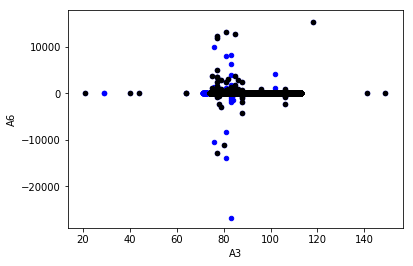

<Figure size 432x288 with 0 Axes>

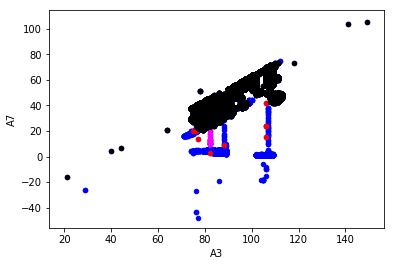

<Figure size 432x288 with 0 Axes>

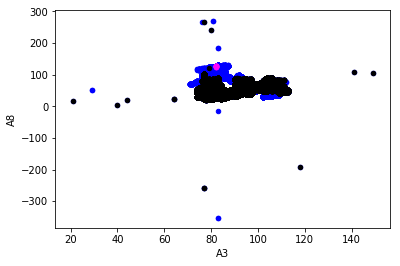

<Figure size 432x288 with 0 Axes>

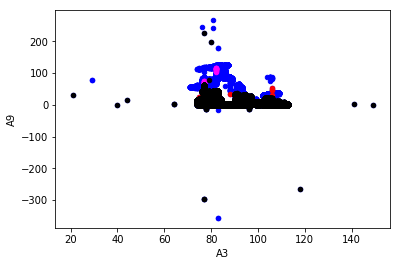

<Figure size 432x288 with 0 Axes>

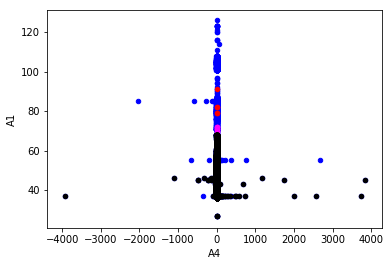

<Figure size 432x288 with 0 Axes>

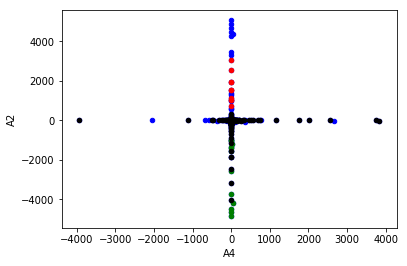

<Figure size 432x288 with 0 Axes>

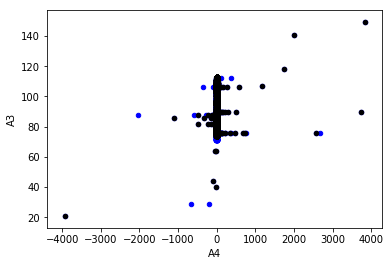

<Figure size 432x288 with 0 Axes>

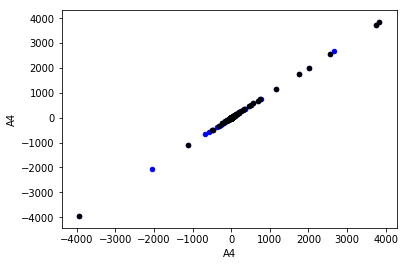

<Figure size 432x288 with 0 Axes>

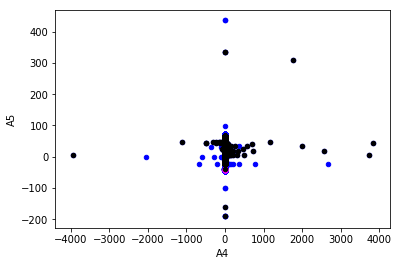

<Figure size 432x288 with 0 Axes>

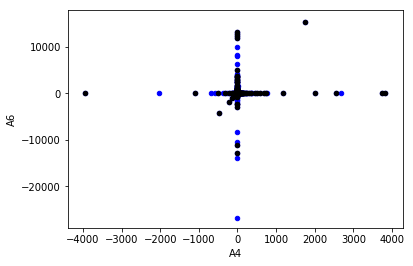

<Figure size 432x288 with 0 Axes>

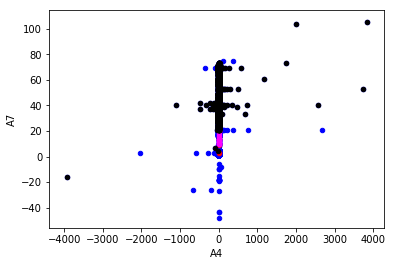

<Figure size 432x288 with 0 Axes>

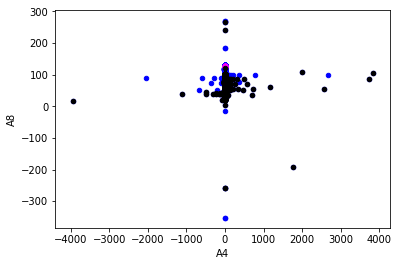

<Figure size 432x288 with 0 Axes>

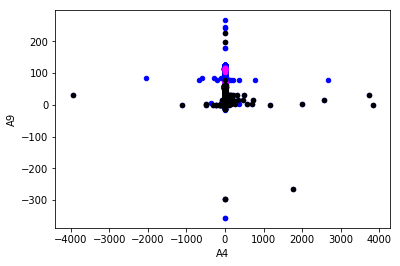

<Figure size 432x288 with 0 Axes>

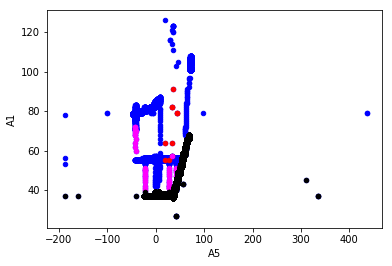

<Figure size 432x288 with 0 Axes>

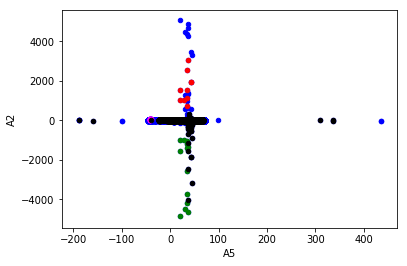

<Figure size 432x288 with 0 Axes>

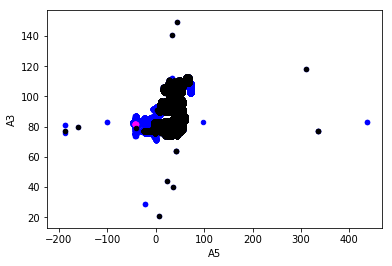

<Figure size 432x288 with 0 Axes>

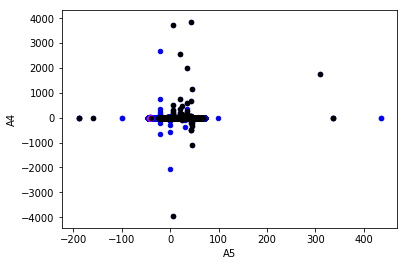

<Figure size 432x288 with 0 Axes>

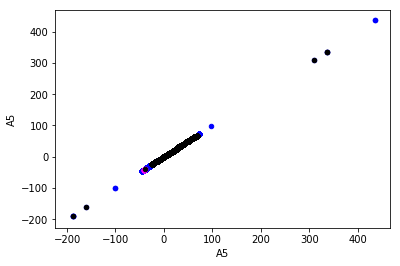

<Figure size 432x288 with 0 Axes>

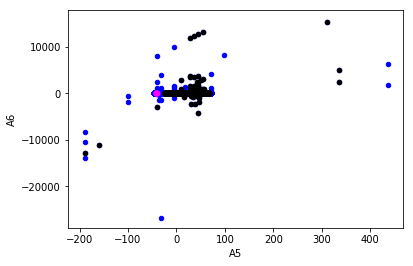

<Figure size 432x288 with 0 Axes>

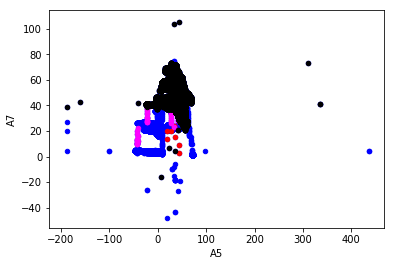

<Figure size 432x288 with 0 Axes>

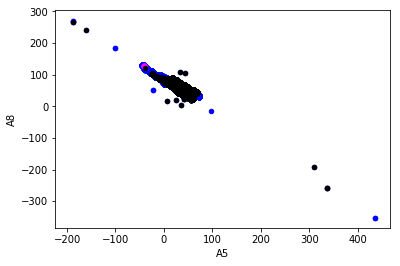

<Figure size 432x288 with 0 Axes>

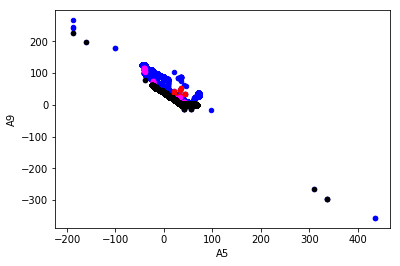

<Figure size 432x288 with 0 Axes>

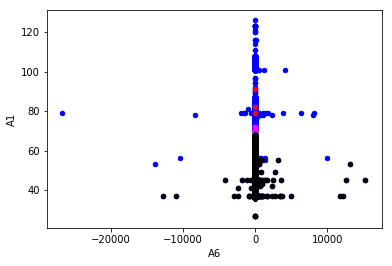

<Figure size 432x288 with 0 Axes>

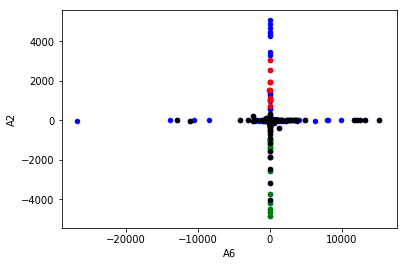

<Figure size 432x288 with 0 Axes>

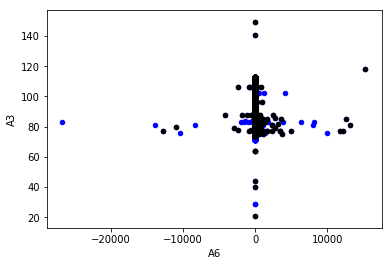

<Figure size 432x288 with 0 Axes>

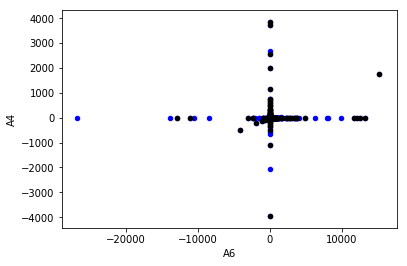

<Figure size 432x288 with 0 Axes>

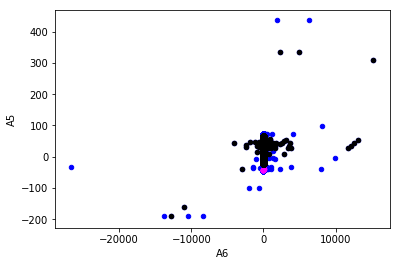

<Figure size 432x288 with 0 Axes>

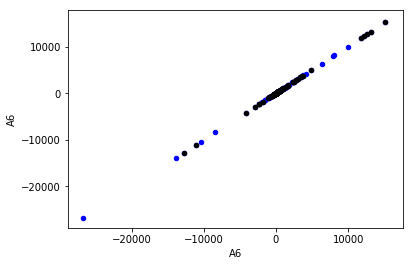

<Figure size 432x288 with 0 Axes>

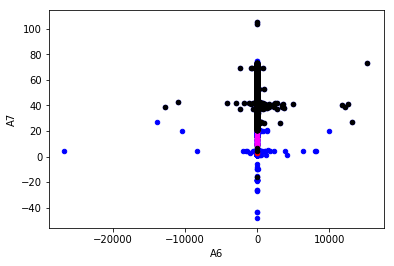

<Figure size 432x288 with 0 Axes>

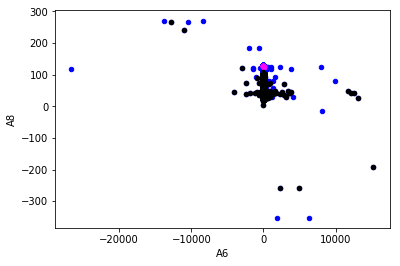

<Figure size 432x288 with 0 Axes>

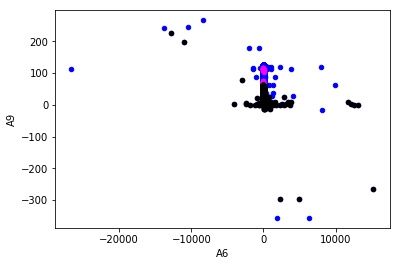

<Figure size 432x288 with 0 Axes>

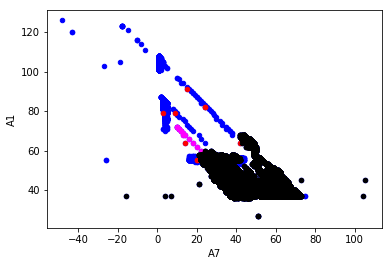

<Figure size 432x288 with 0 Axes>

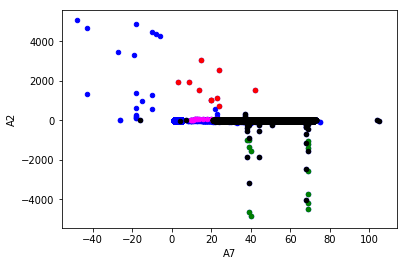

<Figure size 432x288 with 0 Axes>

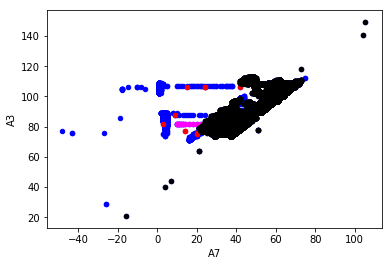

<Figure size 432x288 with 0 Axes>

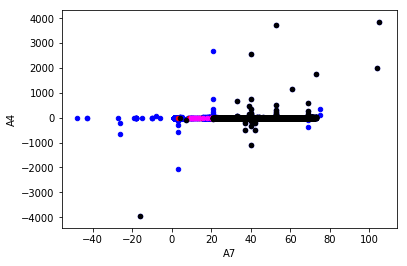

<Figure size 432x288 with 0 Axes>

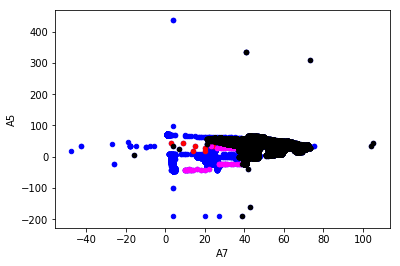

<Figure size 432x288 with 0 Axes>

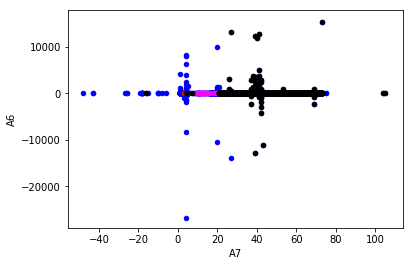

<Figure size 432x288 with 0 Axes>

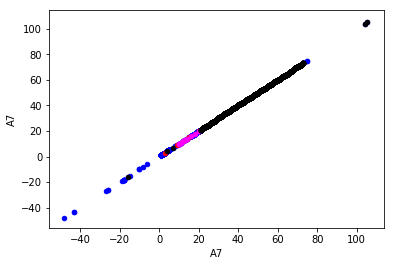

<Figure size 432x288 with 0 Axes>

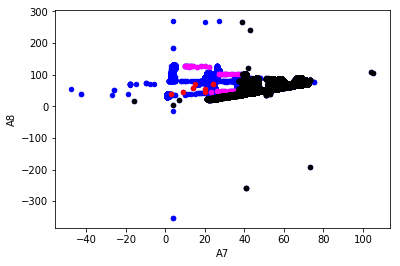

<Figure size 432x288 with 0 Axes>

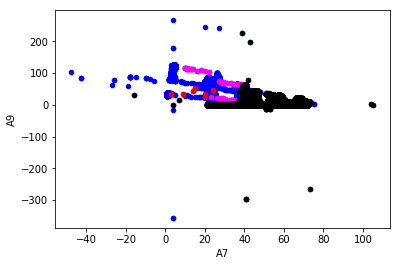

<Figure size 432x288 with 0 Axes>

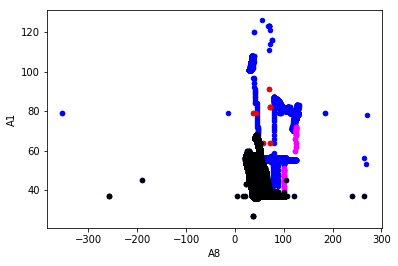

<Figure size 432x288 with 0 Axes>

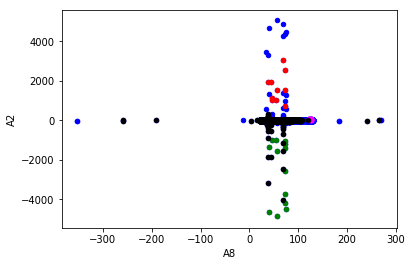

<Figure size 432x288 with 0 Axes>

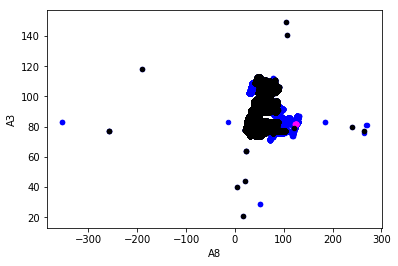

<Figure size 432x288 with 0 Axes>

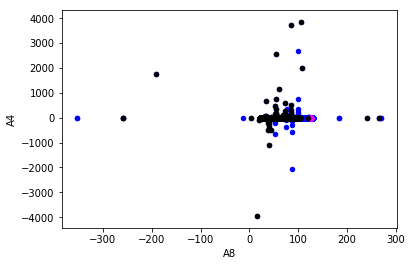

<Figure size 432x288 with 0 Axes>

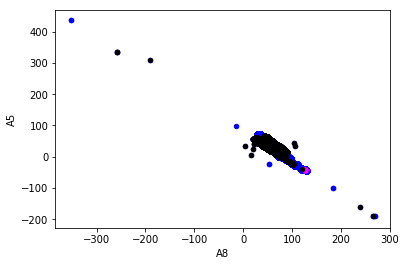

<Figure size 432x288 with 0 Axes>

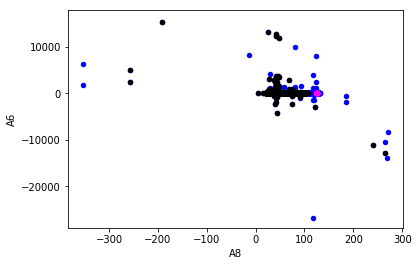

<Figure size 432x288 with 0 Axes>

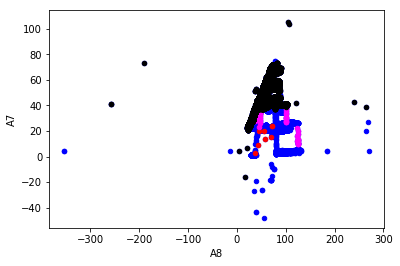

<Figure size 432x288 with 0 Axes>

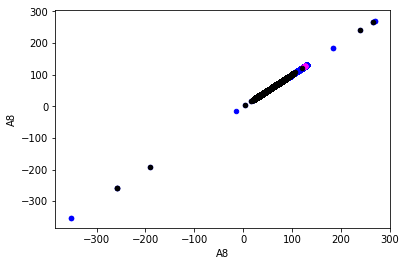

<Figure size 432x288 with 0 Axes>

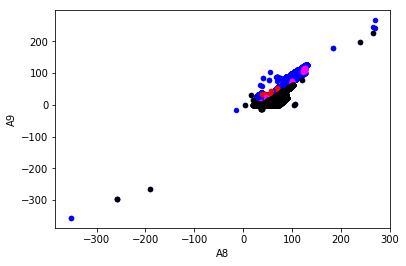

<Figure size 432x288 with 0 Axes>

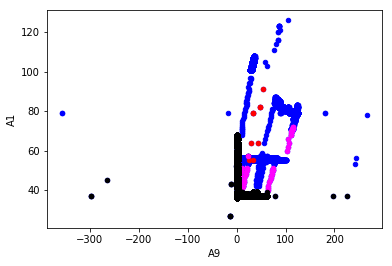

<Figure size 432x288 with 0 Axes>

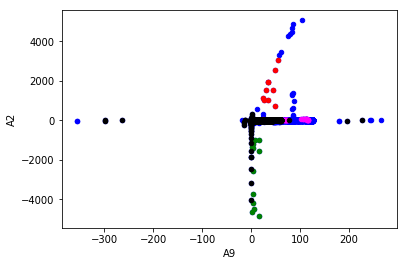

<Figure size 432x288 with 0 Axes>

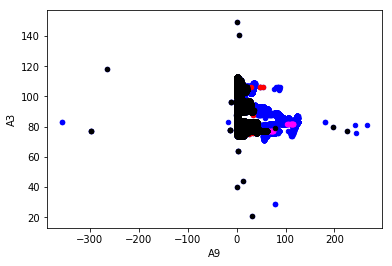

<Figure size 432x288 with 0 Axes>

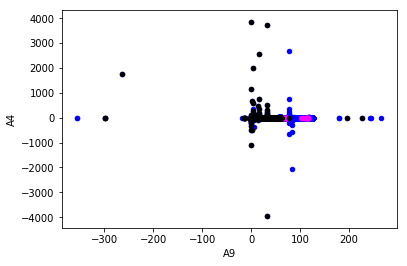

<Figure size 432x288 with 0 Axes>

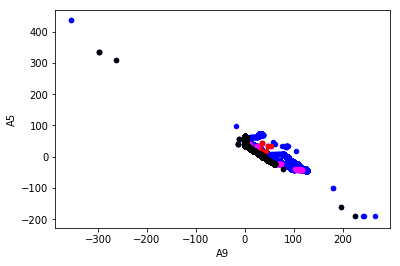

<Figure size 432x288 with 0 Axes>

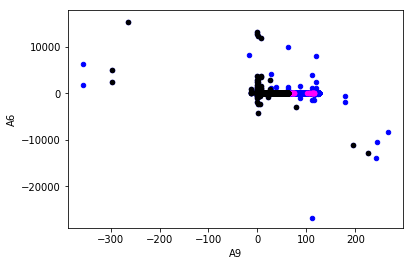

<Figure size 432x288 with 0 Axes>

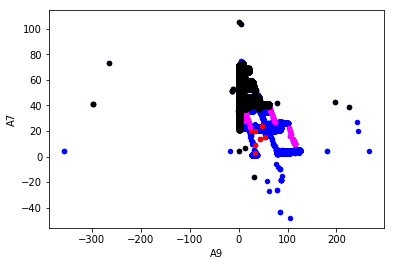

<Figure size 432x288 with 0 Axes>

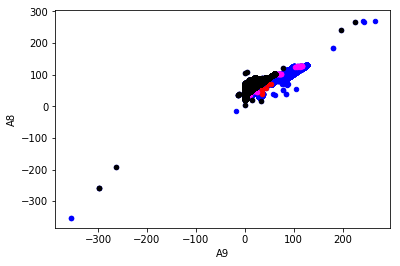

<Figure size 432x288 with 0 Axes>

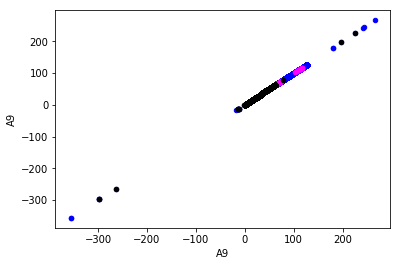

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Load in the shuttle dataset
shut = pd.read_csv('C:\\Users\\Alex White\\Desktop\\shuttle_data.csv')
class_balance = shut['class'].value_counts()

#Check the class balances
plt.figure()
print(class_balance)
class_balance.plot.bar(rot=0)
plt.xlabel('Class index')
plt.ylabel('Frequency')
plt.title('Class balances in the shuttle dataset')
plt.show()

#Query the frame to get the minority classes in isolation
class_6 = shut.loc[shut['class']==6]
class_7 = shut.loc[shut['class']==7]
class_2 = shut.loc[shut['class']==2]
class_1 = shut.loc[shut['class']==1]
f_names = shut.columns.values[0:-1]

#Have a look where the classes end up in each feature space
for ii in f_names:
    for jj in f_names:
        plt.figure()
        ax1 = shut.plot.scatter(x=ii, y=jj, color='blue')
        ax2 = class_6.plot.scatter(x=ii, y=jj, color='red', ax=ax1)
        ax3 = class_7.plot.scatter(x=ii, y=jj, color='green', ax=ax2)
        ax4 = class_2.plot.scatter(x=ii, y=jj, color='magenta', ax=ax3)
        ax5 = class_1.plot.scatter(x=ii, y=jj, color='black', ax=ax4)
        plt.show()


Checking what happens when we take very small samples from the available features - for example if we were to undersample one of the overrepresented classes

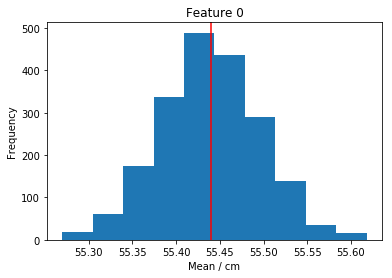

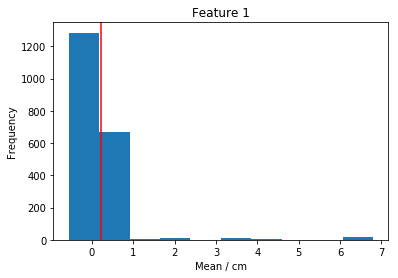

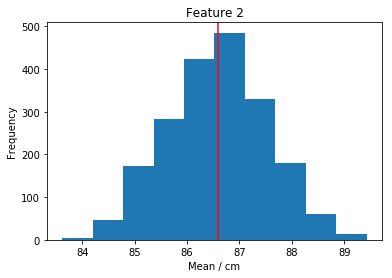

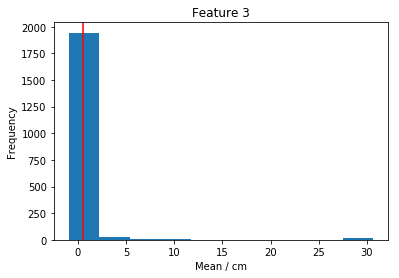

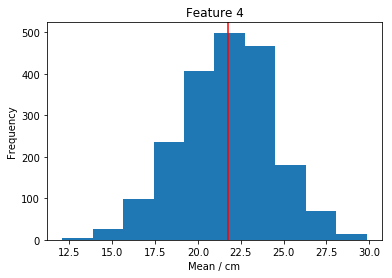

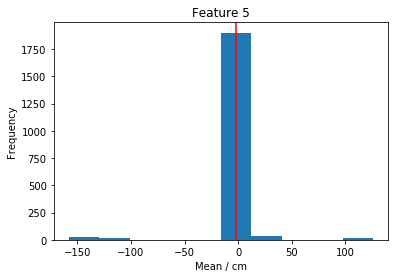

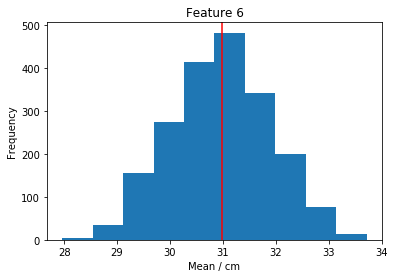

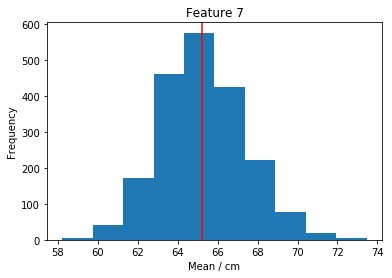

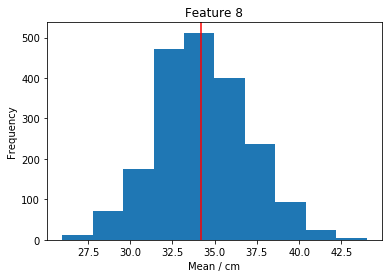

In [21]:
num_repeats = 2000
chosen_class = 4
minority_class = shut.loc[shut['class']==chosen_class]
means = []
true_means = minority_class.mean().values

#Observe how computed feature mean behaves when drawing samples
for ii in range(num_repeats):
    sample = minority_class.sample(frac=0.01)
    sample_mean = sample.mean().values.tolist()
    means.append(sample_mean)

for jj in range(9):
    d = [i[jj] for i in means]
    plt.figure()
    plt.hist(d)
    plt.axvline(true_means[jj], 0, axs[jj].get_ylim()[1], color='red')
    plt.xlabel('Mean / cm')
    plt.ylabel('Frequency')
    plt.title('Feature {}'.format(jj))
plt.show()